In [1]:
library(tidyverse)
library(RColorBrewer)
library(DESeq2)
library(pheatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

In [2]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/Additive_expression_Tml')

In [3]:
## Loading data
data <- read.table("DESeq2_count_matrix_Tml_additive.csv", sep=",",header = T,row.names=1)
## first column is row names: row.names = 1

In [4]:
## Loading data
data_new <- data[c("Tdu_1", "Tdu_2", "Tdu_3", "Tdu_4", "Tdu_5", "Tdu_6", "Tpr_1", "Tpr_2", "Tpr_3", "Tml_2", "Tml_3")]
meta_new <- read.csv("DESeq2_Tml_additive_sample_annotation_new.tsv", sep = "\t", row.names="sample")

In [5]:
head(data_new)

,Tdu_1,Tdu_2,Tdu_3,Tdu_4,Tdu_5,Tdu_6,Tpr_1,Tpr_2,Tpr_3,Tml_2,Tml_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,92,109,123,106,116,121,103,173,78,58,79
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,157,218,281,177,169,238,204,402,205,137,111
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,36,64,58,43,36,47,21,25,18,20,9
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1,96,140,142,80,126,108,141,200,119,38,47
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3,773,1099,976,809,1113,918,751,1281,700,337,388
Tpr_TRINITY_DN12798_c2_g2|Tdu_TRINITY_DN24179_c2_g3,50,46,72,28,48,39,35,118,55,49,58


In [6]:
## match the metadata and counts data
all(colnames(data_new) %in% rownames(meta_new))

[1] TRUE

In [7]:
## Creat DESeq2Dataset object
dds_new <- DESeqDataSetFromMatrix(countData = data_new, colData = meta_new, design = ~ species)
## generate size factors
## By assigning the results back to the dds object we are filling in the slots of the DESeqDataSet object with the appropriate info
dds_new <- estimateSizeFactors(dds_new)

In [8]:
head(counts(dds_new, normalized=TRUE))

,Tdu_1,Tdu_2,Tdu_3,Tdu_4,Tdu_5,Tdu_6,Tpr_1,Tpr_2,Tpr_3,Tml_2,Tml_3
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,83.36933,81.12413,78.53594,109.34753,89.53791,113.09218,119.22526,107.93476,98.09236,96.82991,132.87579
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,142.27157,162.24826,179.41950,182.58975,130.44748,222.44577,236.13546,250.80795,257.80685,228.71893,186.69889
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,32.62278,47.63252,37.03321,44.35796,27.78763,43.92837,24.30806,15.59751,22.63670,33.38962,15.13775
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1,86.99408,104.19613,90.66750,82.52644,97.25670,100.94178,163.21128,124.78007,149.65373,63.44029,79.05268
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3,700.48359,817.93961,623.17947,834.54862,859.10083,858.00513,869.30262,799.21637,880.31607,562.61517,652.60513
Tpr_TRINITY_DN12798_c2_g2|Tdu_TRINITY_DN24179_c2_g3,45.30942,34.23587,45.97226,28.88425,37.05017,36.45120,40.51344,73.62024,69.16769,81.80458,97.55438


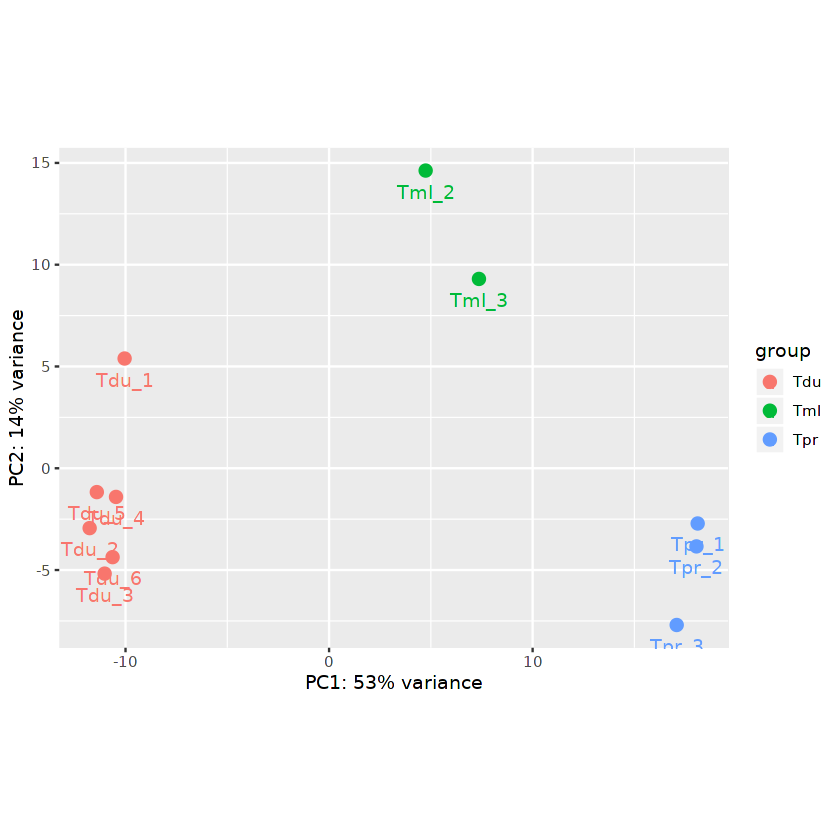

In [9]:
## Transform normalized counts using the rlog transformation
## The rlog transformation of the normalized counts is only necessary for these visualization methods during this quality assessment
## The blind=TRUE argument results in a transformation unbiased to sample condition information
rld_new <- rlog(dds_new, blind=TRUE)

## Plot PCA
plotPCA(rld_new, intgroup="species") + geom_text(aes(label=name),vjust=2)

In [10]:
## log2 fold change shrinkage will NOT be performed
## But this will generate the proper resultsNames(dds_new) results, which will be used for comparing MPV to polyploid
## No shrinkage won't affect the number of DE genes identified

dds_new <- DESeq(dds_new, betaPrior = TRUE)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



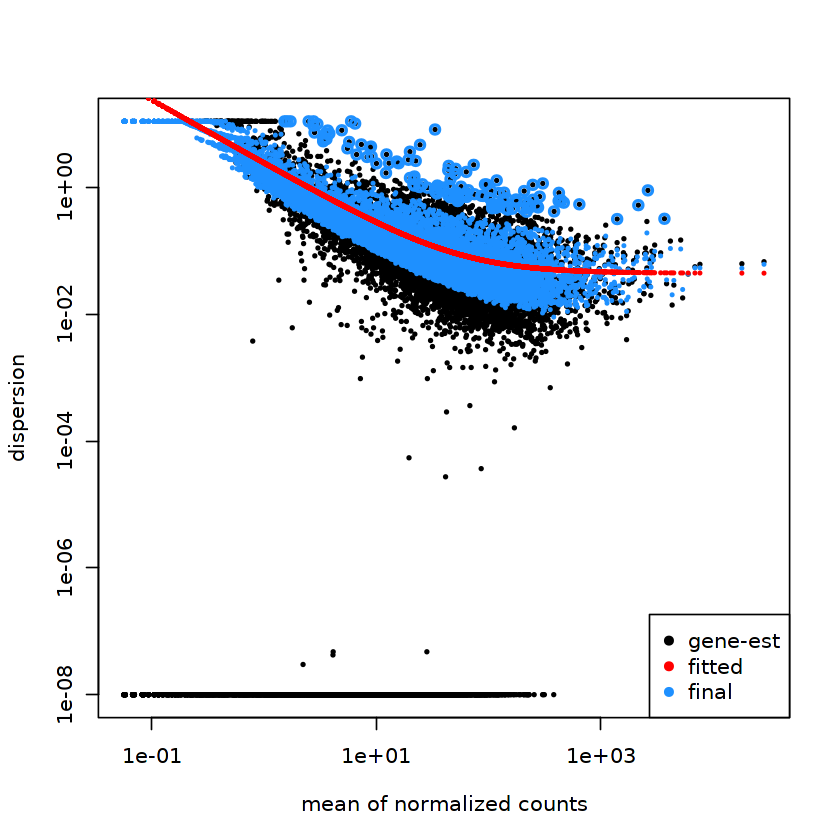

In [11]:
plotDispEsts(dds_new)

In [12]:
resultsNames(dds_new)

[1] "Intercept"  "speciesTdu" "speciesTml" "speciesTpr"

In [13]:
## Diplid DE analysis between Tdu and Tpr
## Tpr is the baseline
res_diploid_DE <- results(dds_new, contrast=c("species", "Tdu", "Tpr"), alpha=0.05)

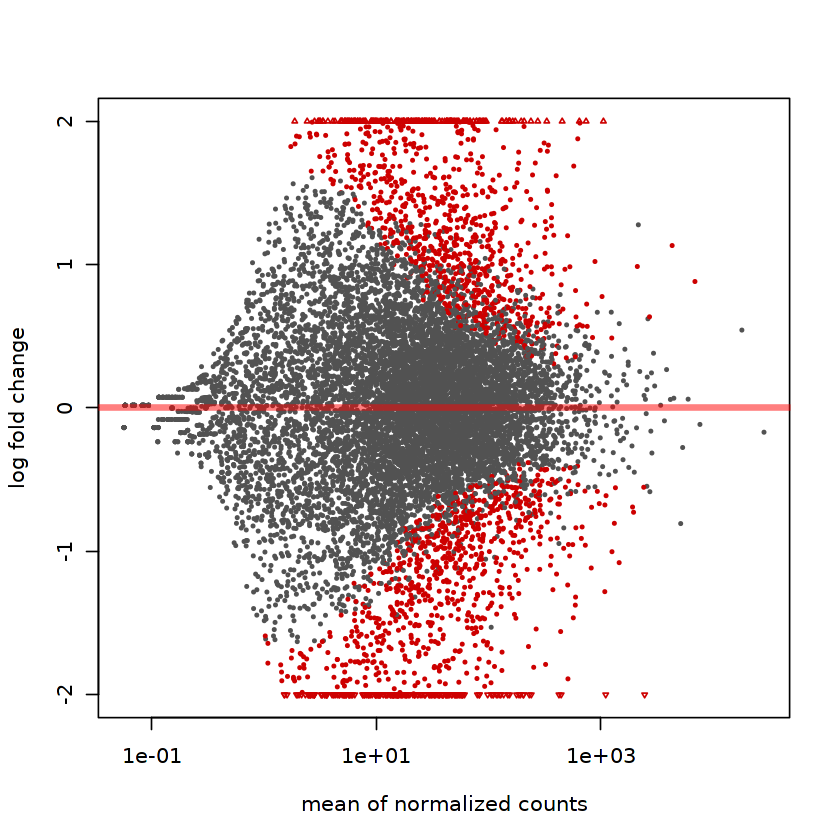

In [14]:
plotMA(res_diploid_DE, ylim=c(-2,2))

In [15]:
summary(res_diploid_DE)


out of 11680 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 959, 8.2%
LFC < 0 (down)     : 985, 8.4%
outliers [1]       : 10, 0.086%
low counts [2]     : 905, 7.7%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [16]:
## Write out Tdu and Tpr DE loci with LFC
DE_loci_Tdu_higher <- subset(res_diploid_DE, (padj < 0.05 & log2FoldChange > 0))
write.table(DE_loci_Tdu_higher, "DESeq2_DE_loci_Tdu_higher.txt", sep="\t", quote=F, row.names = TRUE)

DE_loci_Tpr_higher <- subset(res_diploid_DE, (padj < 0.05 & log2FoldChange < 0))
write.table(DE_loci_Tpr_higher, "DESeq2_DE_loci_Tpr_higher.txt", sep="\t", quote=F, row.names = TRUE)


out of 11680 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 717, 6.1%
LFC < 0 (down)     : 764, 6.5%
outliers [1]       : 10, 0.086%
low counts [2]     : 1810, 15%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



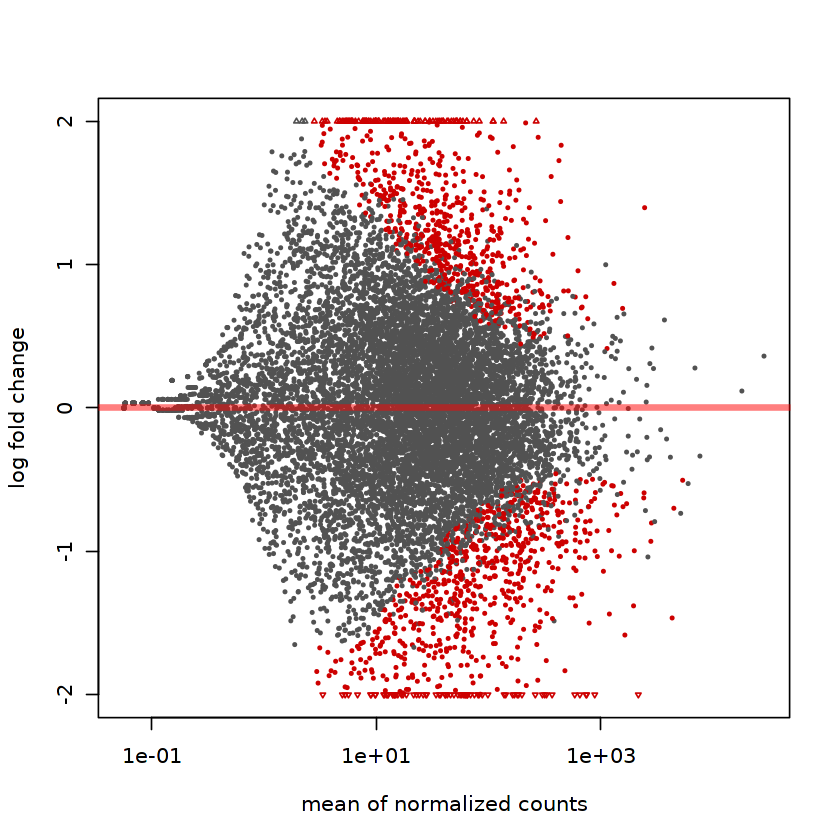

In [18]:
## Diploid DE analysis between Tml and Tdu
## Tdu is the baseline
res_Tml_Tdu_DE <- results(dds_new, contrast=c("species", "Tml", "Tdu"), alpha=0.05)
plotMA(res_Tml_Tdu_DE, ylim=c(-2,2))
summary(res_Tml_Tdu_DE)

## Write out Tml and Tdu DE loci with LFC
DE_loci_Tml_higher_than_Tdu <- subset(res_Tml_Tdu_DE, (padj < 0.05 & log2FoldChange > 0))
write.table(DE_loci_Tml_higher_than_Tdu, "DESeq2_DE_loci_Tml_higher_than_Tdu.txt", sep="\t", quote=F, row.names = TRUE)

DE_loci_Tdu_higher_than_Tml <- subset(res_Tml_Tdu_DE, (padj < 0.05 & log2FoldChange < 0))
write.table(DE_loci_Tdu_higher_than_Tml, "DESeq2_DE_loci_Tdu_higher_than_Tml.txt", sep="\t", quote=F, row.names = TRUE)

## Write out nonDE loci between Tml and Tdu
non_DE_loci_Tml_Tdu <- subset(res_Tml_Tdu_DE, padj >= 0.05)
write.table(non_DE_loci_Tml_Tdu, "DESeq2_noneDE_loci_Tml_Tdu.txt", sep="\t", quote=F, row.names = TRUE)


out of 11680 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 536, 4.6%
LFC < 0 (down)     : 567, 4.9%
outliers [1]       : 10, 0.086%
low counts [2]     : 1810, 15%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



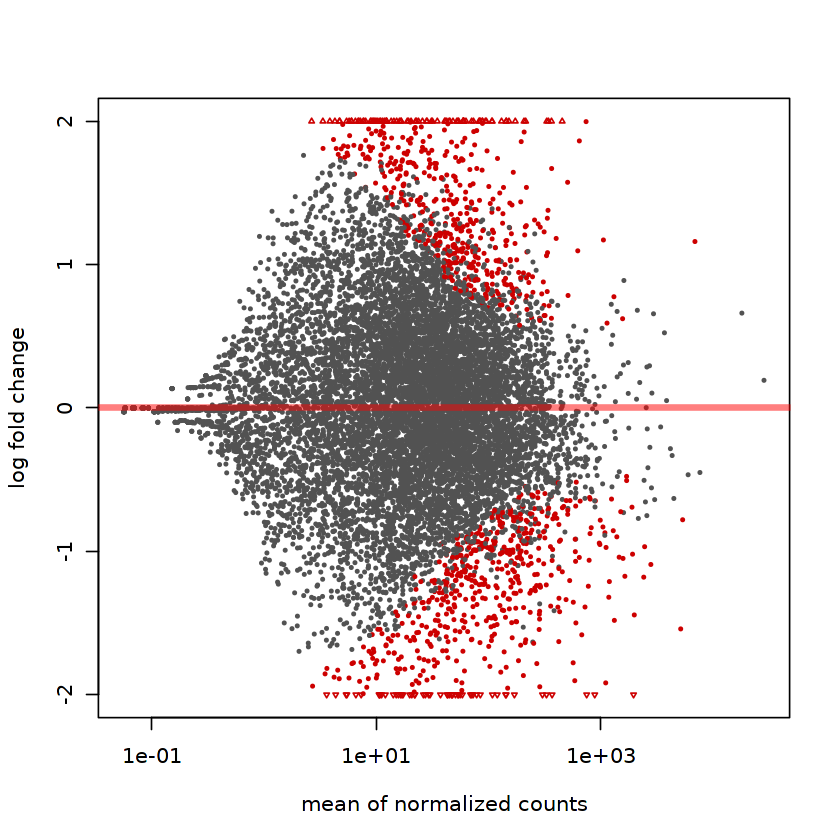

In [19]:
## Diploid DE analysis between Tml and Tpr
## Tpr is the baseline
res_Tml_Tpr_DE <- results(dds_new, contrast=c("species", "Tml", "Tpr"), alpha=0.05)
plotMA(res_Tml_Tpr_DE, ylim=c(-2,2))
summary(res_Tml_Tpr_DE)

## Write out Tml and Tpr DE loci with LFC
DE_loci_Tml_higher_than_Tpr <- subset(res_Tml_Tpr_DE, (padj < 0.05 & log2FoldChange > 0))
write.table(DE_loci_Tml_higher_than_Tpr, "DESeq2_DE_loci_Tml_higher_than_Tpr.txt", sep="\t", quote=F, row.names = TRUE)

DE_loci_Tpr_higher_than_Tml <- subset(res_Tml_Tpr_DE, (padj < 0.05 & log2FoldChange < 0))
write.table(DE_loci_Tpr_higher_than_Tml, "DESeq2_DE_loci_Tpr_higher_than_Tml.txt", sep="\t", quote=F, row.names = TRUE)

## Write out nonDE loci between Tml and Tpr
non_DE_loci_Tml_Tpr <- subset(res_Tml_Tpr_DE, padj >= 0.05)
write.table(non_DE_loci_Tml_Tpr, "DESeq2_noneDE_loci_Tml_Tpr.txt", sep="\t", quote=F, row.names = TRUE)